In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'data\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Integer column datattype is object so we need to convert that object datatype to int.

In [4]:
df[df['Reviews'].str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
df[df['Reviews'].str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
int(df.loc[10472]['Reviews'].split("M")[0][0])

3

In [7]:
df = df.replace(df.loc[10472]['Reviews'], int(df.loc[10472]['Reviews'].split("M")[0][0])*100000)

Converted one categorical row of Reviews column to integer

In [8]:
df[df['Reviews'].str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                            300000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [10]:
df['Reviews'].dtype

dtype('O')

Again the datatype is object but all the values inside the column are numeric so we can convert the data type from object to int

In [11]:
df['Reviews'] = df['Reviews'].astype("int")

In [12]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
df['Reviews'].dtype

dtype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The size column contains the letters M & K as mega byte and kilo bytes respectively. Now if we want to convert this column into integer then we have to make the units same.
- so we can remove k from the rows where k is there
- and we can convert no * 1024 for M rows to convert that in KB.

In [16]:
for i in range(len(df['Size'])):
    size = df['Size'][i]

    if isinstance(size, str):  # Check if it's a string
        if "M" in size:
            size_in_kb = float(size.split("M")[0]) * 1024
            df['Size'][i] = size_in_kb
        elif "k" in size:
            df['Size'][i] = float(size.split("k")[0])
    else:
        df['Size'][i] = df['Size'][i]

In [17]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
df["Size"] = df['Size'].replace("Varies with device", np.nan)

In [19]:
df["Size"].isna().sum()

1695

In [20]:
df["Size"].unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, nan,
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 62

In [21]:
df["Size"].dtype

dtype('O')

In [22]:
df[df["Size"] == "1,000+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,300000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df["Size"] = df['Size'].replace("1,000+", "1000")

In [24]:
df["Size"] = df["Size"].astype("float")

In [25]:
df["Size"].dtype

dtype('float64')

In [26]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [28]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [29]:
remove_char = ['$', ',', '+']
remove_columns = ['Price','Installs']

for i in remove_char:
    for j in remove_columns:
        df[j] = df[j].str.replace(i,'')

In [30]:
df['Installs'] = df['Installs'].replace("Free", 0)

In [34]:
df['Price'] = df['Price'].replace("Everyone", 0.0)

In [36]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [37]:
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', 0.0,
       '1.20', '1.04'], dtype=object)

In [38]:
df["Installs"] = df["Installs"].astype("int")
df["Price"] = df["Price"].astype("float")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1016.5+ KB


In [53]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df = df.drop(index = 10472)
df[df['Last Updated'] == '1.0.19']

In [95]:
df['Last Updated'] = df['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y').date())

In [96]:
df['Last Updated']

0        2018-01-07
1        2018-01-15
2        2018-08-01
3        2018-06-08
4        2018-06-20
            ...    
10836    2017-07-25
10837    2018-07-06
10838    2017-01-20
10839    2015-01-19
10840    2018-07-25
Name: Last Updated, Length: 10840, dtype: object

In [98]:
df.to_csv("./data/Cleaned_playstore_data.csv", index = False)

In [104]:
df_cleaned = pd.read_csv(r"data\Cleaned_playstore_data.csv")
df_cleaned.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [105]:
df_cleaned.shape

(10840, 13)

In [106]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [107]:
df_cleaned.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [111]:
df_cleaned.describe(include = "all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10839,10840.000000,10840,10840,10840,10832,10838
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03,Varies with device,4.1 and up
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842,326,1459,2451
mean,NaN,NaN,4.191757,4.441529e+05,24013.155703,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515219,2.927761e+06,32313.711985,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,8.500000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,5120.000000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,13312.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.477550e+04,30720.000000,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [119]:
pd.set_option("display.max_rows", 5)
df_cleaned[df_cleaned.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,88064.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up
10767,AAFP,MEDICAL,3.8,63,24576.0,10000,Free,0.0,Everyone,Medical,2018-06-22,2.3.1,5.0 and up


**Seperate the numerical & Categorical features**

In [131]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [132]:
categorical_features = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtype == "O"]
numerical_features = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtype != "O"]

In [133]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [134]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

**% of each category in any of the categorical variable**

In [137]:
df_cleaned['Genres'].value_counts(normalize = True)*100

Genres
Tools                  7.767528
Entertainment          5.747232
                         ...   
Tools;Education        0.009225
Strategy;Creativity    0.009225
Name: proportion, Length: 119, dtype: float64

**Check the distribution of each numerical feature**

In [146]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

<Axes: xlabel='Price', ylabel='Density'>

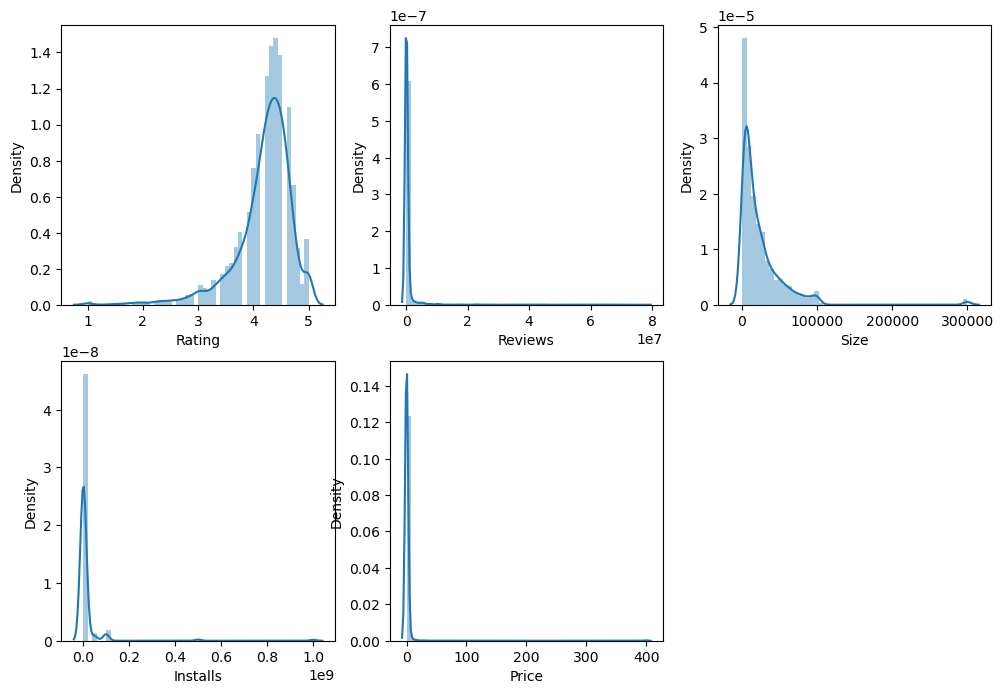

In [153]:
plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
sns.distplot(df_cleaned[numerical_features]['Rating'])
plt.subplot(2,3,2)
sns.distplot(df_cleaned[numerical_features]['Reviews'])
plt.subplot(2,3,3)
sns.distplot(df_cleaned[numerical_features]['Size'])
plt.subplot(2,3,4)
sns.distplot(df_cleaned[numerical_features]['Installs'])
plt.subplot(2,3,5)
sns.distplot(df_cleaned[numerical_features]['Price'])

**Same using the for loop**

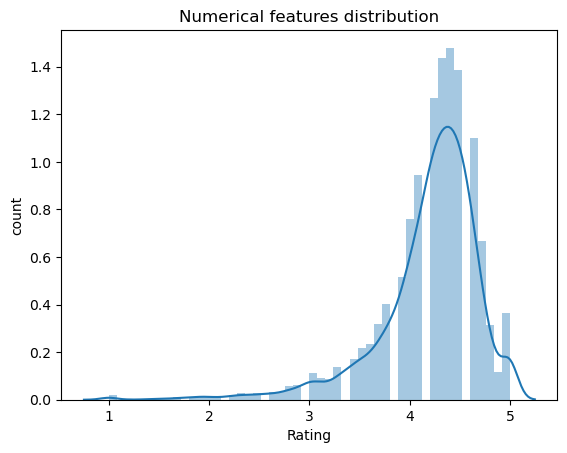

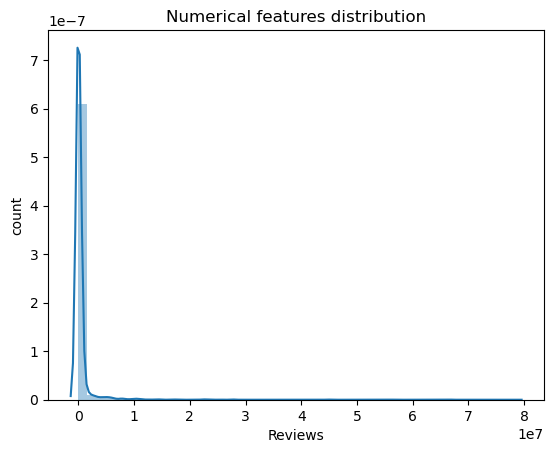

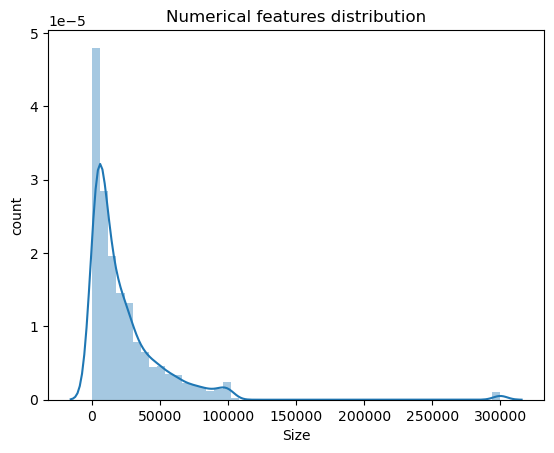

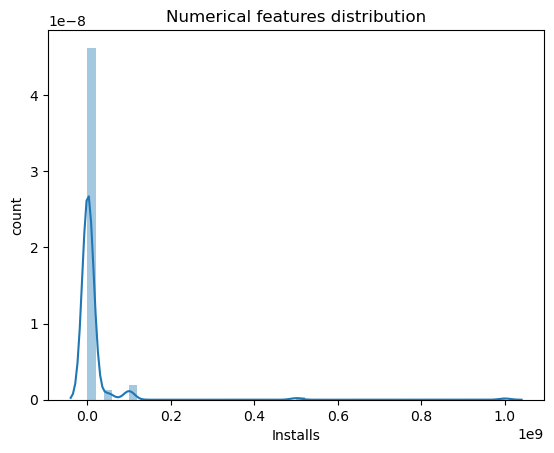

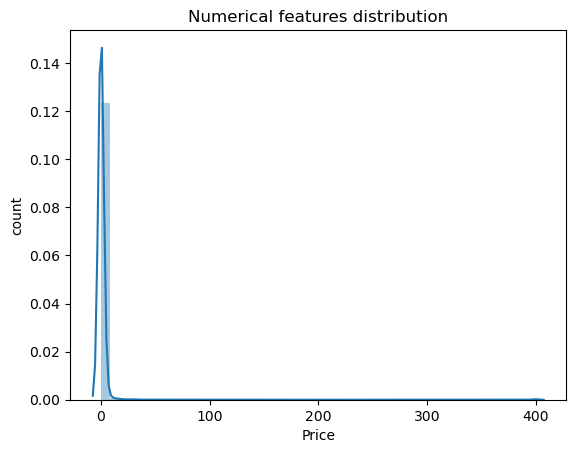

In [164]:
for feature in numerical_features:
    sns.distplot(df_cleaned[numerical_features][feature])
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title("Numerical features distribution")
    plt.show()


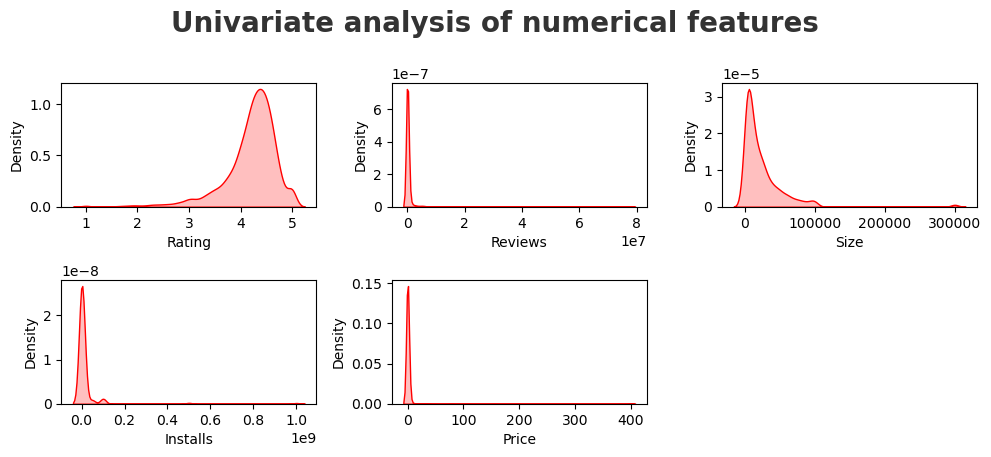

In [170]:
plt.figure(figsize = (10,10))
plt.suptitle("Univariate analysis of numerical features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)

for i in range(len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df_cleaned[numerical_features[i]], shade = True, color = 'r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Observations**
- None of the numerical feature is normally distributed
- Rating is left skewed 
- Other than Rating Reviews, Size, Installs, Price all are right skewed

**Similarly check the counts of categorical features**

In [171]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [172]:
df_cleaned[categorical_features]

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,Free,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [173]:
df_cleaned[categorical_features]['Type'].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

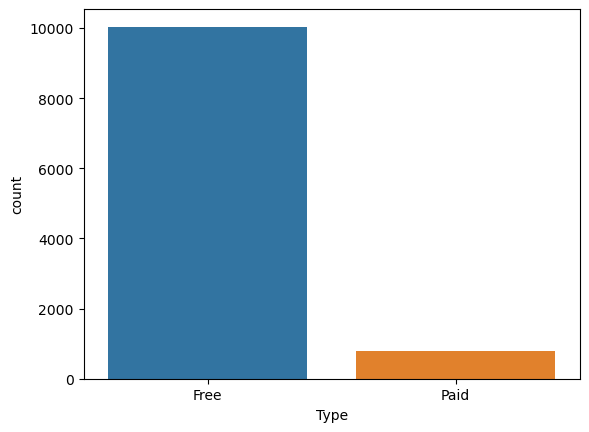

In [179]:
sns.countplot(x = df_cleaned[categorical_features]['Type'])

In [180]:
df_cleaned[categorical_features]['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
                   ... 
Adults only 18+       3
Unrated               2
Name: count, Length: 6, dtype: int64

In [186]:
df_cleaned[categorical_features]['Category'].value_counts()

Category
FAMILY    1972
GAME      1144
          ... 
COMICS      60
BEAUTY      53
Name: count, Length: 33, dtype: int64

<Axes: xlabel='Content Rating', ylabel='count'>

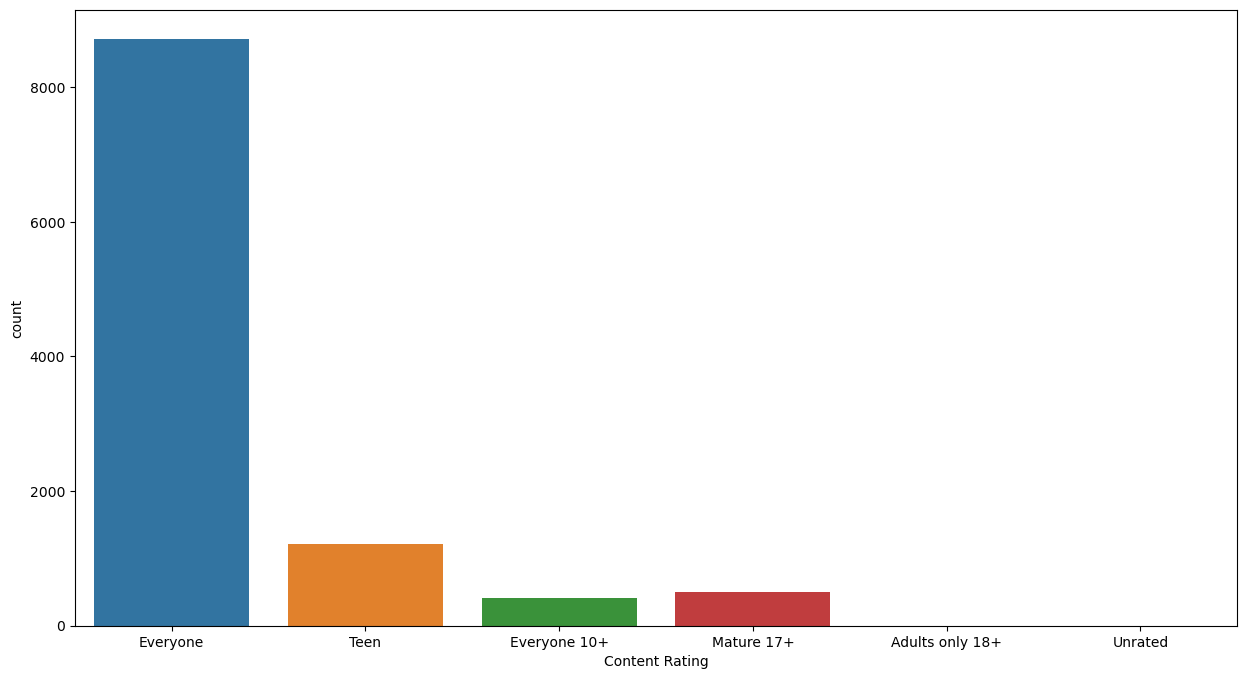

In [182]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_cleaned[categorical_features]['Content Rating'])

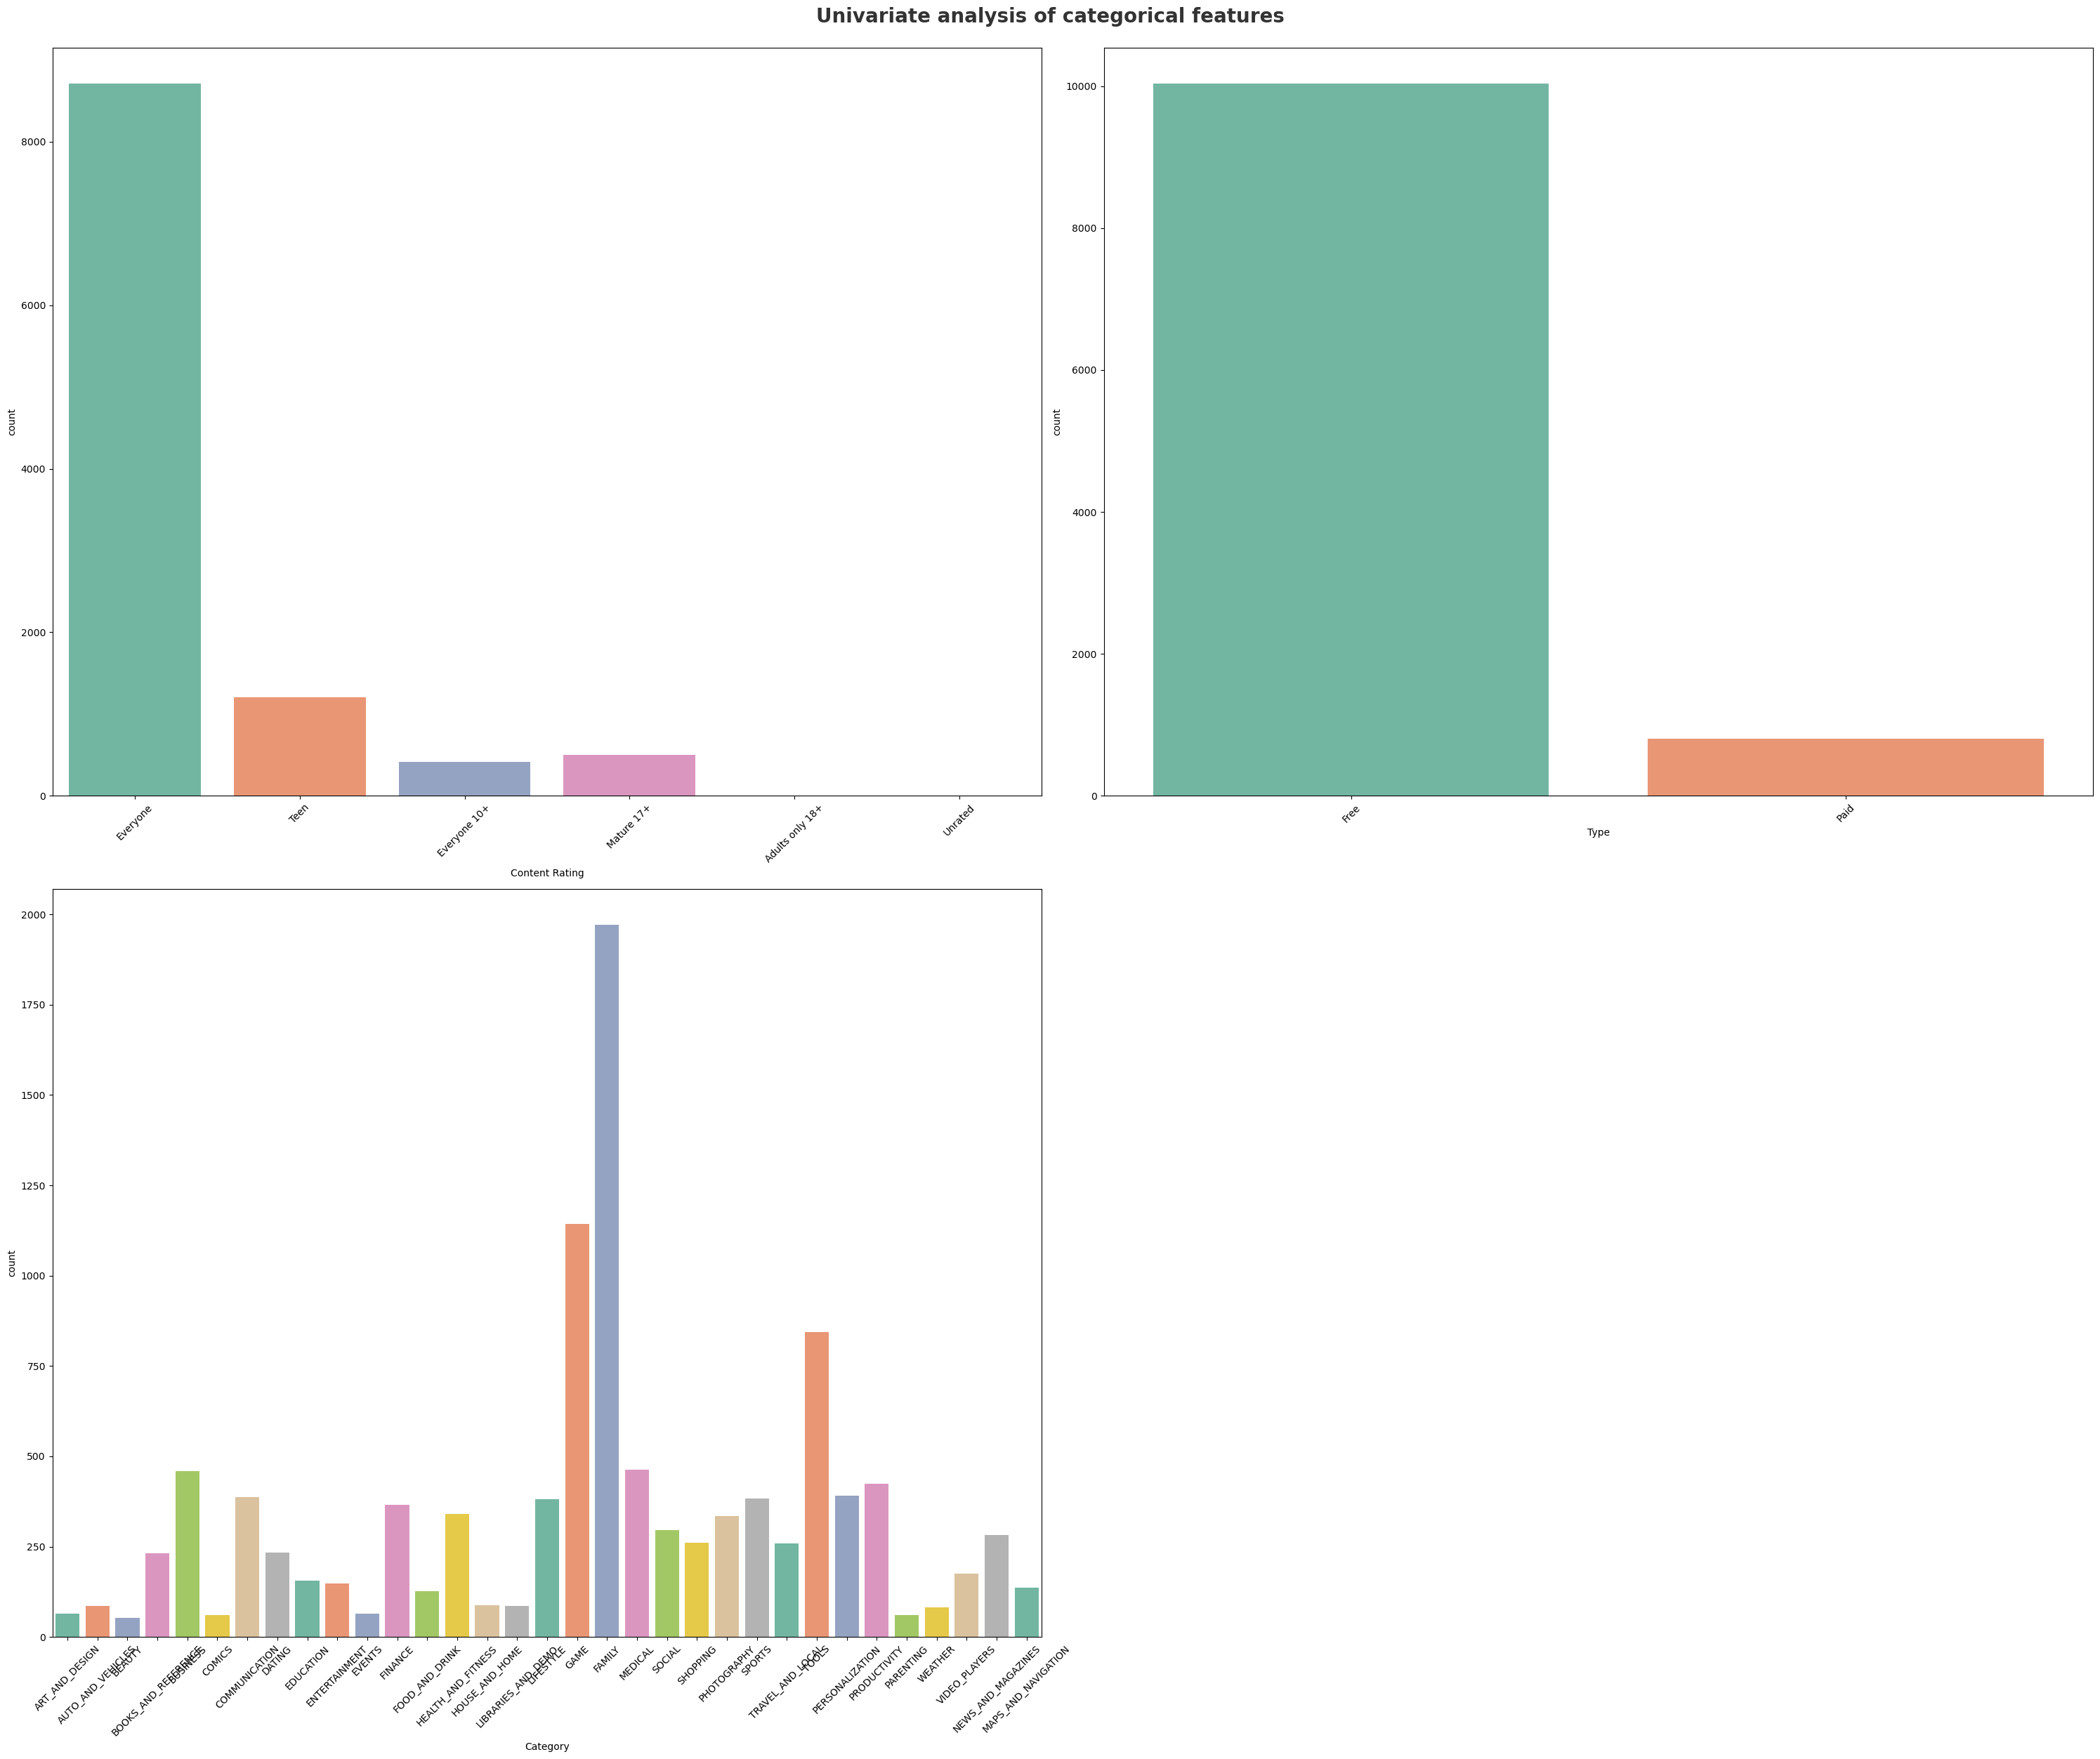

In [188]:
plt.figure(figsize = (30,25))
plt.suptitle("Univariate analysis of categorical features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)

category = ['Content Rating', 'Type', 'Category']
for i in range(len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df_cleaned[category[i]], palette = "Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

### **Which one wil be the most popular category**

<Axes: ylabel='count'>

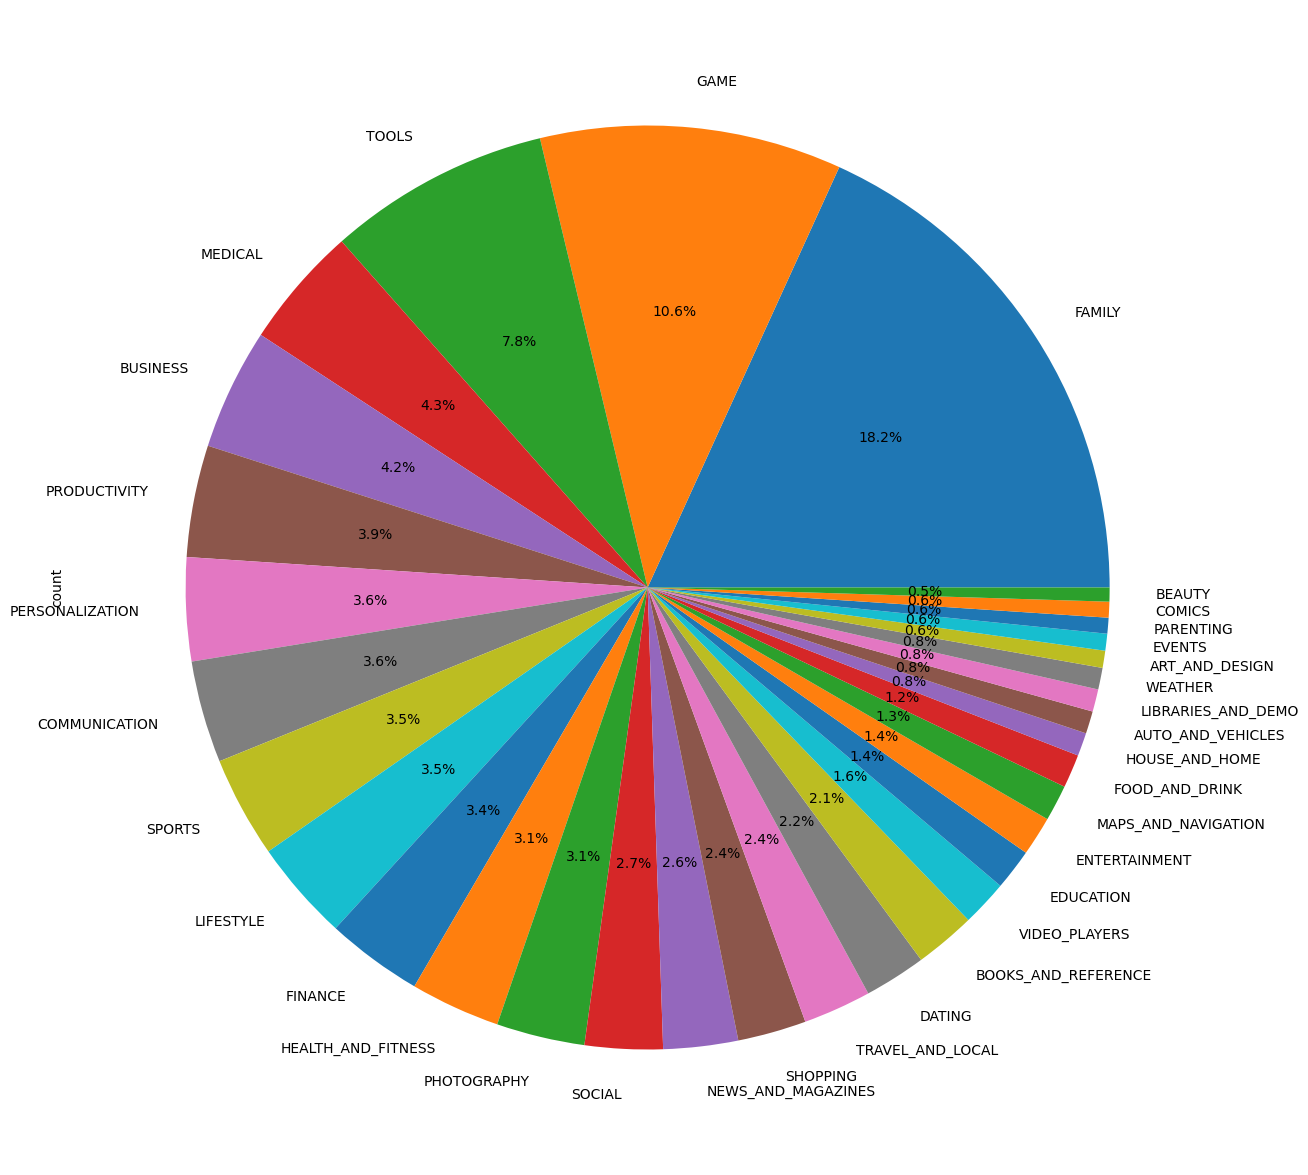

In [203]:
df_cleaned[categorical_features]['Category'].value_counts(sort = True).plot.pie(figsize = (20, 15), autopct = '%1.1f%%')

### **plot top 10 categories**

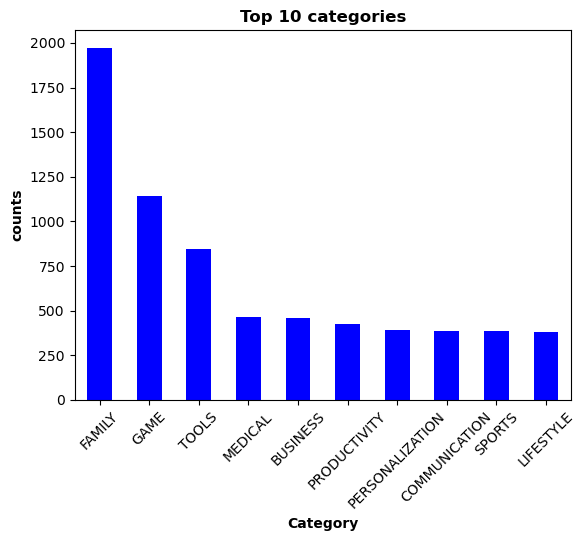

In [218]:
df_cleaned[categorical_features]['Category'].value_counts(sort = True)[:10].plot.bar(color = 'blue')
plt.xlabel("Category", fontweight = "bold")
plt.ylabel("counts", fontweight = "bold")
plt.title("Top 10 categories", fontweight = "bold")
plt.xticks(rotation = 45)
plt.show()

### **Which category has maximum no of installations**

In [241]:
pd.set_option("display.max_rows", 10)
df_cleaned.groupby(['Category'])['Installs'].sum().sort_values(ascending = False)

Category
GAME                 35086024415
COMMUNICATION        32647276251
PRODUCTIVITY         14176091369
SOCIAL               14069867902
TOOLS                11452771915
                        ...     
MEDICAL                 53257437
AUTO_AND_VEHICLES       53130211
PARENTING               31521110
BEAUTY                  27197050
EVENTS                  15973161
Name: Installs, Length: 33, dtype: int64

In [244]:
df_cleaned.groupby(['Category'])['Installs'].sum().nlargest(1)

Category
GAME    35086024415
Name: Installs, dtype: int64

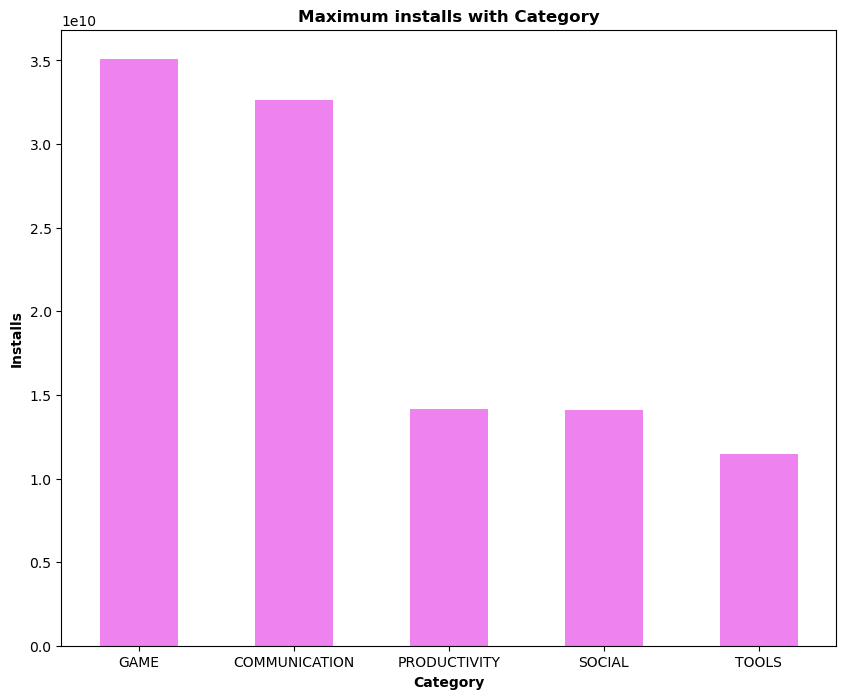

In [259]:
df_cleaned.groupby(['Category'])['Installs'].sum().nlargest(5).plot.bar(color = "violet", figsize = (10, 8))
plt.xlabel("Category", fontweight = "bold")
plt.ylabel("Installs", fontweight = "bold")
plt.title("Maximum installs with Category", fontweight = "bold")
plt.xticks(rotation = 0)
plt.show()

### **How many apps are there on google play store with rating = 5**

In [275]:
df_cleaned.groupby(['App'])["Rating"].max().sort_values(ascending = False)

App
BI News                                                                          5.0
EC Calgary                                                                       5.0
EB Scanner                                                                       5.0
EB Cash Collections                                                              5.0
CJ Gospel Hour                                                                   5.0
                                                                                ... 
【Ranobbe complete free】 Novelba - Free app that you can read and write novels    NaN
パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）                                                  NaN
中国語 AQリスニング                                                                      NaN
哈哈姆特不EY                                                                          NaN
뽕티비 - 개인방송, 인터넷방송, BJ방송                                                          NaN
Name: Rating, Length: 9659, dtype: float64

In [278]:
df_cleaned['App'][df_cleaned['Rating'] == 5]

329                    Hojiboy Tojiboyev Life Hacks
612                   American Girls Mobile Numbers
615                                    Awake Dating
633                           Spine- The dating app
636      Girls Live Talk - Free Text and Video Chat
                            ...                    
10720                             Mad Dash Fo' Cash
10741                         GKPB FP Online Church
10775                              Monster Ride Pro
10819                               Fr. Daoud Lamei
10836              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 274, dtype: object

### **Does size of the app has any impact on its popularity**
### **What are the top 5 most installed apps in each category**
### **Which category apps users are reviwing the most**
### **Which kind of the app user are downloading the most free/paid**

### **Now we will handle the missing values**

In [280]:
df_cleaned.isna().sum().sort_values(ascending = False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
                  ... 
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Length: 13, dtype: int64

In [285]:
df_cleaned.shape

(10840, 13)

In [286]:
1695/10840

0.15636531365313652

In [288]:
df_cleaned['Size'].isna().mean()*100 ## Giving us the % of null values in this column out of whole data

15.636531365313653

In [289]:
null_columns = [feature for feature in df_cleaned.columns if df_cleaned[feature].isna().mean() *100]
null_columns

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [290]:
df_cleaned[null_columns]

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19456.0,Free,1.0.0,4.0.3 and up
1,3.9,14336.0,Free,2.0.0,4.0.3 and up
2,4.7,8908.8,Free,1.2.4,4.0.3 and up
3,4.5,25600.0,Free,Varies with device,4.2 and up
4,4.3,2867.2,Free,1.1,4.4 and up
...,...,...,...,...,...
10835,4.5,54272.0,Free,1.48,4.1 and up
10836,5.0,3686.4,Free,1.0,4.1 and up
10837,NaN,9728.0,Free,1.0,2.2 and up
10838,4.5,NaN,Free,Varies with device,Varies with device


**Now let's see after dropping the null values where the distribution of the column changes or not**

In [291]:
df_drop = df_cleaned[null_columns].dropna()

In [292]:
df_cleaned.shape

(10840, 13)

In [293]:
df_drop.shape

(7723, 5)

**Now lets print the distribution of rating column before and after dropping null values**

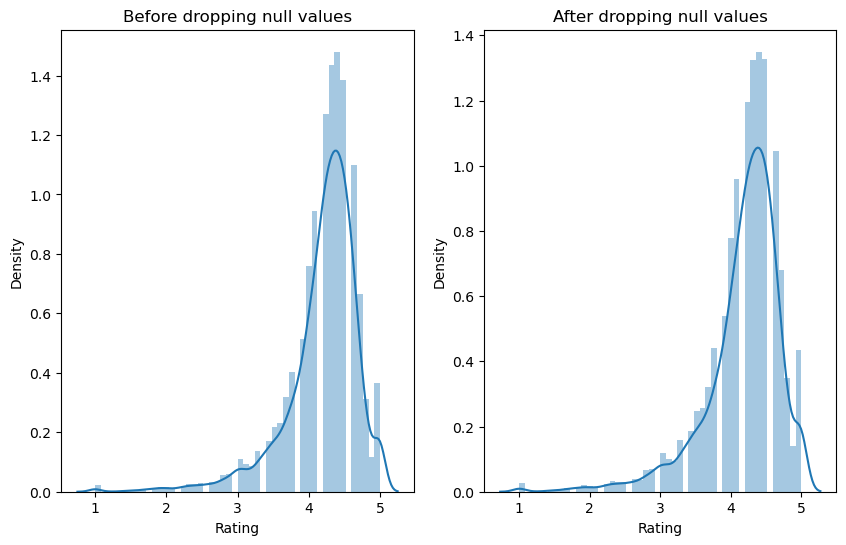

In [299]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.distplot(df_cleaned['Rating'])
plt.title("Before dropping null values")
plt.subplot(1,2,2)
sns.distplot(df_drop['Rating'])
plt.title("After dropping null values")
plt.show()

**Observations**
- Here we don't see any as such difference in the distribution of rating column after dropping the null values

### **Mean Mode & Median**

In [316]:
df_copy1 = df_cleaned.copy()

In [317]:
df_copy1["Size"].isna().sum()

1695

**We can fill the null values with both Mean, Median & Mode if the data is categorical**

In [326]:
df_copy1['Size'].mean()

24013.15570256971

In [318]:
df_copy1['Size'] = df_copy1['Size'].fillna(df_copy1['Size'].mean())

In [319]:
df_copy1["Size"].isna().sum()

0

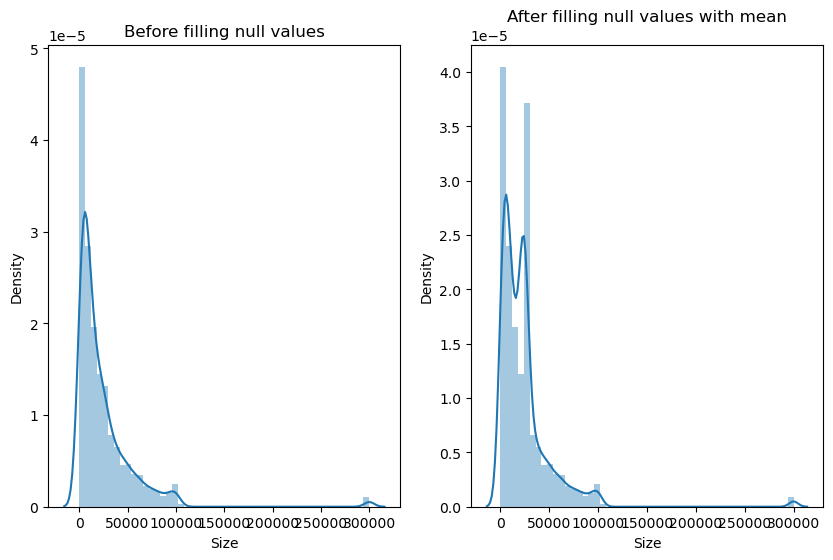

In [320]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.distplot(df_cleaned['Size'])
plt.title("Before filling null values")
plt.subplot(1,2,2)
sns.distplot(df_copy1['Size'])
plt.title("After filling null values with mean")
plt.show()

In [321]:
df_copy2 = df_cleaned.copy()
df_copy2["Size"].isna().sum()

1695

In [325]:
df_copy2['Size'].median()

13312.0

In [322]:
df_copy2['Size'] = df_copy2['Size'].fillna(df_copy2['Size'].median())

In [323]:
df_copy2["Size"].isna().sum()

0

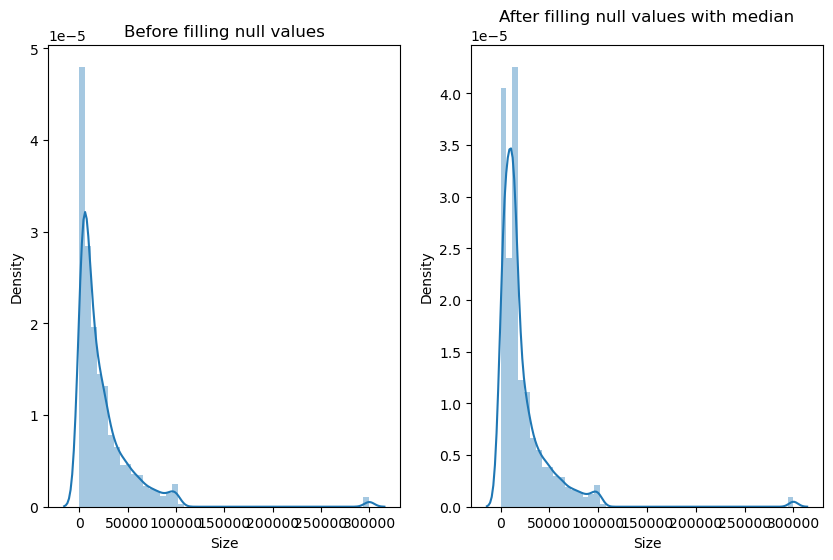

In [324]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.distplot(df_cleaned['Size'])
plt.title("Before filling null values")
plt.subplot(1,2,2)
sns.distplot(df_copy2['Size'])
plt.title("After filling null values with median")
plt.show()

**Observations**
- After filling the null values with mean or mode still the distribution is not getting to normal.
- But as compare to filling null values with mean, filling with median gives us the little bit correct distribution

### **Now let's check with the random sample imputation**

In [355]:
df_random = df_cleaned.copy()

In [356]:
df_random['Size'].isna().sum()

1695

**Before taking the samples for imputaion we need to drop the null values from that column**

In [357]:
sample_impute = df_random['Size'].dropna().sample(df_random['Size'].isna().sum())

In [358]:
sample_impute

7835      2150.4
1733     71680.0
10049    88064.0
6398     11264.0
6616      7168.0
          ...   
9197      3993.6
4532      6041.6
7176     22528.0
4362     26624.0
3187     19456.0
Name: Size, Length: 1695, dtype: float64

In [359]:
null_index = df_random[df_random['Size'].isna()].index
null_index

Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,    92,
       ...
       10646, 10678, 10680, 10706, 10711, 10712, 10724, 10764, 10825, 10838],
      dtype='int64', length=1695)

In [365]:
df_random.loc[df_random['Size'].isna(), "Size"] = sample_impute

In [369]:
df_random['Size'] = df_random['Size'].fillna(df_random['Size'].dropna().sample(df_random['Size'].isna().sum()))

In [370]:
df_random['Size'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10835    False
10836    False
10837    False
10838     True
10839    False
Name: Size, Length: 10840, dtype: bool